# Polynomial Regression - Lab

## Introduction

In this lab you'll practice your knowledge on adding polynomial terms to your regression model! 

## Objectives

You will be able to:

- Understand how to account for non-linear relationships between predictors and target variable using polynomial terms

## Create the best plot using polynomials!

Below, we created a plot with a clearly non-linear shape.

- plot a polynomial function using `PolynomialFeatures` for polynomials up until the second, third and fourth degree.
- print out the $R^2$ value for each of the three results. Draw conclusions with respect to which degree is best.

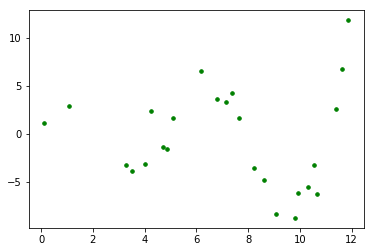

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

def pol(x):
    return x * np.cos(x)

x = np.linspace(0, 12, 100)
rng = np.random.RandomState(1234)
rng.shuffle(x)
x = np.sort(x[:25])
y = pol(x) + np.random.randn(25)*2

plt.scatter(x, y, color='green', s=50, marker='.')

plt.show();

## Solution

degree 2 0.04640196221468329
degree 3 0.7935941102824785
degree 4 0.8124592508176147


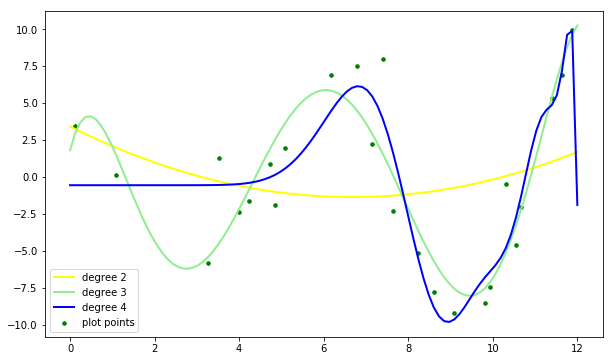

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

% matplotlib inline

def pol(x):
    return x * np.cos(x)

x = np.linspace(0, 12, 100)
rng = np.random.RandomState(1234)
rng.shuffle(x)
x = np.sort(x[:25])
y = pol(x) + np.random.randn(25)*2

x_plot = np.linspace(0, 12, 100)

# reshape the arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['yellow', 'lightgreen', 'blue']
plt.figure(figsize=(10,6))
plt.scatter(x, y, color='green', s=50, marker='.', label="plot points")


#index goes from 0,1,2 and degree goes from 2,3,4
for index, degree in enumerate([2,3,4]):
    poly = PolynomialFeatures(degree)
    X = poly.fit_transform(X)
    X_plot = poly.fit_transform(X_plot)
    reg_poly = LinearRegression().fit(X, y)
    y_plot = reg_poly.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[index], linewidth = 2 ,
             label="degree %d" % degree)
    print("degree %d" % degree, r2_score(y, reg_poly.predict(X)))

plt.legend(loc='lower left')
plt.show();

degree 2 0.013285175914231284

degree 3 0.9126341307899343

degree 4 0.8609275710964498

In [13]:
help(PolynomialFeatures)

Help on class PolynomialFeatures in module sklearn.preprocessing.data:

class PolynomialFeatures(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Generate polynomial and interaction features.
 |  
 |  Generate a new feature matrix consisting of all polynomial combinations
 |  of the features with degree less than or equal to the specified degree.
 |  For example, if an input sample is two dimensional and of the form
 |  [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
 |  
 |  Parameters
 |  ----------
 |  degree : integer
 |      The degree of the polynomial features. Default = 2.
 |  
 |  interaction_only : boolean, default = False
 |      If true, only interaction features are produced: features that are
 |      products of at most ``degree`` *distinct* input features (so not
 |      ``x[1] ** 2``, ``x[0] * x[2] ** 3``, etc.).
 |  
 |  include_bias : boolean
 |      If True (default), then include a bias column, the feature in which
 |      all pol

In [14]:
help(poly.fit_transform)

Help on method fit_transform in module sklearn.base:

fit_transform(X, y=None, **fit_params) method of sklearn.preprocessing.data.PolynomialFeatures instance
    Fit to data, then transform it.
    
    Fits transformer to X and y with optional parameters fit_params
    and returns a transformed version of X.
    
    Parameters
    ----------
    X : numpy array of shape [n_samples, n_features]
        Training set.
    
    y : numpy array of shape [n_samples]
        Target values.
    
    Returns
    -------
    X_new : numpy array of shape [n_samples, n_features_new]
        Transformed array.



In [15]:
help(LinearRegression().fit)

Help on method fit in module sklearn.linear_model.base:

fit(X, y, sample_weight=None) method of sklearn.linear_model.base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : array-like or sparse matrix, shape (n_samples, n_features)
        Training data
    
    y : array_like, shape (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary
    
    sample_weight : numpy array of shape [n_samples]
        Individual weights for each sample
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : returns an instance of self.



## Summary

Great! You now know how to include polynomials in your linear model!